<a href="https://colab.research.google.com/github/ImmanuelNK/Exercise-DATAMINING/blob/main/AFL2_DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AFL 2 Clustering algorithm K-Means & Hierarchical Clustering

*   Immanuel Nissi Krissianto - 0706022210032
*   Steivan Henry Octavian - 0706022210038




## **IMPORT LIBRARIES**

In [1]:
!pip install kneed
from kneed import KneeLocator
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.impute import SimpleImputer
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster
import scipy.cluster.hierarchy as sch
from datetime import datetime


## **Load Dataset**

The Dataset that we will use is a **Customer Analysis**. In this dataset that will be 28 features including :
The dataset that we will use on this project is Customer Analysis Dataset. Below are the columns with the descriptions of each column

**People**
*   ID: Customer's unique identifier
*   Year_Birth: Customer's birth year
*   Education: Customer's education level
*   Marital_Status: Customer's marital status
*   Income: Customer's yearly household income
*   Kidhome: Number of children in customer's household
*   Teenhome: Number of teenagers in customer's household
*   Dt_Customer: Date of customer's enrollment with the company
*   Recency: Number of days since customer's last purchase
*   Complain: 1 if the customer complained in the last 2 years, 0 otherwise


**Products**
*   MntWines: Amount spent on wine in last 2 years
*   MntFruits: Amount spent on fruits in last 2 years
*   MntMeatProducts: Amount spent on meat in last 2 years
*   MntFishProducts: Amount spent on fish in last 2 years
*   MntSweetProducts: Amount spent on sweets in last 2 years
*   MntGoldProds: Amount spent on gold in last 2 years Promotion
*   NumDealsPurchases: Number of purchases made with a discount
*   AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
*   AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
*   AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
*   AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
*   AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
*   Response: 1 if customer accepted the offer in the last campaign, 0 otherwise


**Place**
*   NumWebPurchases: Number of purchases made through the company’s website
*   NumCatalogPurchases: Number of purchases made using a catalogue
*   NumStorePurchases: Number of purchases made directly in stores
*   NumWebVisitsMonth: Number of visits to company’s website in the last month

**Promotion**
*   NumDealsPurchases : Number of purchases made with a discount
*   AcceptedCmp1 : 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
*   AcceptedCmp2 : 2 if the customer accepted the offer in the 1st campaign, 0 otherwise
*   AcceptedCmp3 : 3 if the customer accepted the offer in the 1st campaign, 0 otherwise
*   AcceptedCmp4 : 4 if the customer accepted the offer in the 1st campaign, 0 otherwise
*   AcceptedCmp5 : 5 if the customer accepted the offer in the 1st campaign, 0 otherwise
*   Response : 1 if the customer accepted the offer in the last campaign, 0 otherwise












In [2]:
df = pd.read_excel("https://raw.githubusercontent.com/ImmanuelNK/Dataset-DATAMINING/refs/heads/main/customer_analysis.xlsx")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# **Data Preparation and Data Cleaning**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [5]:
df.dropna(axis=0, inplace=True)
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [6]:
df.duplicated().value_counts()

,count
False,2216


In [7]:
columns_to_check = ['Marital_Status', 'Education']

# Check and count unique values for each specified column
for col in columns_to_check:
    print(f"\nUnique values and their counts in column '{col}':")
    print(df[col].value_counts(dropna=False))



Unique values and their counts in column 'Marital_Status':
Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

Unique values and their counts in column 'Education':
Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


In [8]:
df['Marital_Status'] = df['Marital_Status'].replace({'Widow': 'Single', 'Alone':'Single', 'YOLO': 'Single', 'Absurd':'Single'})
print(df['Marital_Status'].value_counts())

Marital_Status
Married     857
Together    573
Single      554
Divorced    232
Name: count, dtype: int64


In [9]:
df['Education'] = df['Education'].replace({'2n Cycle': 'Postgraduate', 'Master': 'Postgraduate'})
print(df['Education'].value_counts())

Education
Graduation      1116
Postgraduate     565
PhD              481
Basic             54
Name: count, dtype: int64


In [10]:
df['Education'] = df['Education'].map({'Basic': 0, 'Graduation': 1, 'Postgraduate': 2, 'PhD': 3})
df['Marital_Status'] = df['Marital_Status'].map({'Single': 0, 'Married': 1, 'Divorced': 2, 'Together': 3})
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,1,0,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,1,0,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,1,3,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,1,3,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,3,1,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [11]:
df['Age'] = 2024 - df['Year_Birth']

df.drop(columns=['Year_Birth'], inplace=True)

df.head()


,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1,0,58138.0,0,0,04-09-2012,58,635,88,...,0,0,0,0,0,0,3,11,1,67
1,2174,1,0,46344.0,1,1,08-03-2014,38,11,1,...,0,0,0,0,0,0,3,11,0,70
2,4141,1,3,71613.0,0,0,21-08-2013,26,426,49,...,0,0,0,0,0,0,3,11,0,59
3,6182,1,3,26646.0,1,0,10-02-2014,26,11,4,...,0,0,0,0,0,0,3,11,0,40
4,5324,3,1,58293.0,1,0,19-01-2014,94,173,43,...,0,0,0,0,0,0,3,11,0,43


In [12]:
columns_to_drop = ['ID', 'Z_CostContact', 'Z_Revenue']
df = df.drop(columns=columns_to_drop)
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,1,0,58138.0,0,0,04-09-2012,58,635,88,546,...,4,7,0,0,0,0,0,0,1,67
1,1,0,46344.0,1,1,08-03-2014,38,11,1,6,...,2,5,0,0,0,0,0,0,0,70
2,1,3,71613.0,0,0,21-08-2013,26,426,49,127,...,10,4,0,0,0,0,0,0,0,59
3,1,3,26646.0,1,0,10-02-2014,26,11,4,20,...,4,6,0,0,0,0,0,0,0,40
4,3,1,58293.0,1,0,19-01-2014,94,173,43,118,...,6,5,0,0,0,0,0,0,0,43


In [13]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
today = pd.to_datetime("today")
df['Tenure_Days'] = (today - df['Dt_Customer']).dt.days
def categorize_tenure_to_numeric(days):
    if days < 365:  # < 1 tahun
        return 0  # Baru
    elif 365 <= days <= 1095:  # 1-3 tahun
        return 1  # Sedang
    else:  # > 3 tahun
        return 2  # Lama
df['Tenure_Category'] = df['Tenure_Days'].apply(categorize_tenure_to_numeric)

# Hapus kolom Dt_Customer dan ganti dengan Tenure_Category
df = df.drop(columns=['Dt_Customer', 'Tenure_Days'])

# Tampilkan hasil
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Tenure_Category
0,1,0,58138.0,0,0,58,635,88,546,172,...,7,0,0,0,0,0,0,1,67,2
1,1,0,46344.0,1,1,38,11,1,6,2,...,5,0,0,0,0,0,0,0,70,2
2,1,3,71613.0,0,0,26,426,49,127,111,...,4,0,0,0,0,0,0,0,59,2
3,1,3,26646.0,1,0,26,11,4,20,10,...,6,0,0,0,0,0,0,0,40,2
4,3,1,58293.0,1,0,94,173,43,118,46,...,5,0,0,0,0,0,0,0,43,2


In [14]:
df['Income'] = df['Income'].astype(int)

# **Exploratory Data Analysis (EDA)**

In [15]:
df.describe()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Tenure_Category
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0
mean,1.664711,1.371841,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,55.179603,2.0
std,0.840262,1.118610,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,11.985554,0.0
min,0.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,2.0
25%,1.000000,0.750000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000,2.0
50%,1.000000,1.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000,2.0
75%,2.000000,3.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,2.0
max,3.000000,3.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,131.000000,2.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Education            2216 non-null   int64
 1   Marital_Status       2216 non-null   int64
 2   Income               2216 non-null   int64
 3   Kidhome              2216 non-null   int64
 4   Teenhome             2216 non-null   int64
 5   Recency              2216 non-null   int64
 6   MntWines             2216 non-null   int64
 7   MntFruits            2216 non-null   int64
 8   MntMeatProducts      2216 non-null   int64
 9   MntFishProducts      2216 non-null   int64
 10  MntSweetProducts     2216 non-null   int64
 11  MntGoldProds         2216 non-null   int64
 12  NumDealsPurchases    2216 non-null   int64
 13  NumWebPurchases      2216 non-null   int64
 14  NumCatalogPurchases  2216 non-null   int64
 15  NumStorePurchases    2216 non-null   int64
 16  NumWebVisitsMonth    2216 non

# **Data Preprocessing**

In [17]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Tenure_Category
0,-0.791254,-1.226657,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,...,0.693232,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,2.377952,0.986443,0.0
1,-0.791254,-1.226657,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,...,-0.131574,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,1.236801,0.0
2,-0.791254,1.455848,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,...,-0.543978,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,0.318822,0.0
3,-0.791254,1.455848,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,...,0.280829,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,-1.266777,0.0
4,1.589492,-0.332489,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,...,-0.131574,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,-1.016420,0.0


# **Clustering**

K-Means

In [18]:

# Hitung SSE untuk setiap jumlah cluster (k)
sse = []
for i in range(1, 11):  # Uji nilai k dari 1 hingga 10
    kmeans = KMeans(n_clusters=i, init="random",max_iter=300, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

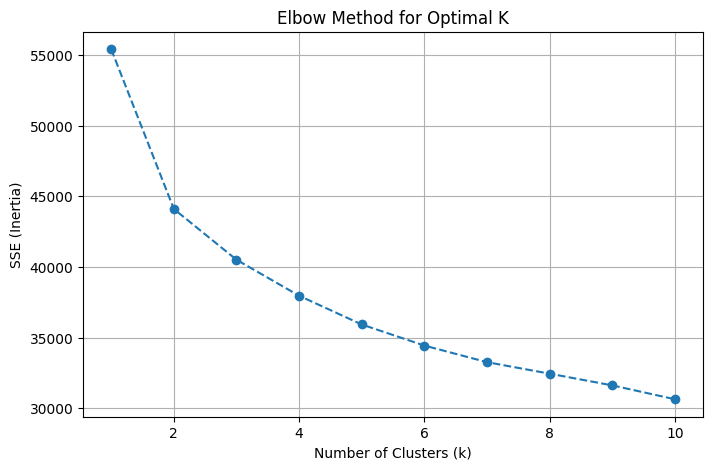

In [19]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.grid()
plt.show()

In [20]:
from kneed import KneeLocator

findknee = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
best_k = findknee.knee
print("the best k for your model is ", best_k)

the best k for your model is  3


Train the K-Means model on the dataset with the number of clusters you have


In [21]:
kmeans = KMeans(n_clusters=3, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(df_scaled)
#inverse data yang diskalakan untuk mendapatkan nilai asli
df_inverse = pd.DataFrame(scaler.inverse_transform(df_scaled), columns=df_scaled.columns)
#menambahkan label kluster ke data asli
df_inverse['KMeans'] = y_pred
# Analyze the clusters with the original values
df_inverse.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Tenure_Category,KMeans
0,1.0,0.0,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,67.0,2.0,1
1,1.0,0.0,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,2.0,2
2,1.0,3.0,71613.0,0.0,0.0,26.0,426.0,49.0,127.0,111.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,2.0,0
3,1.0,3.0,26646.0,1.0,0.0,26.0,11.0,4.0,20.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,2.0,2
4,3.0,1.0,58293.0,1.0,0.0,94.0,173.0,43.0,118.0,46.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0,2.0,2


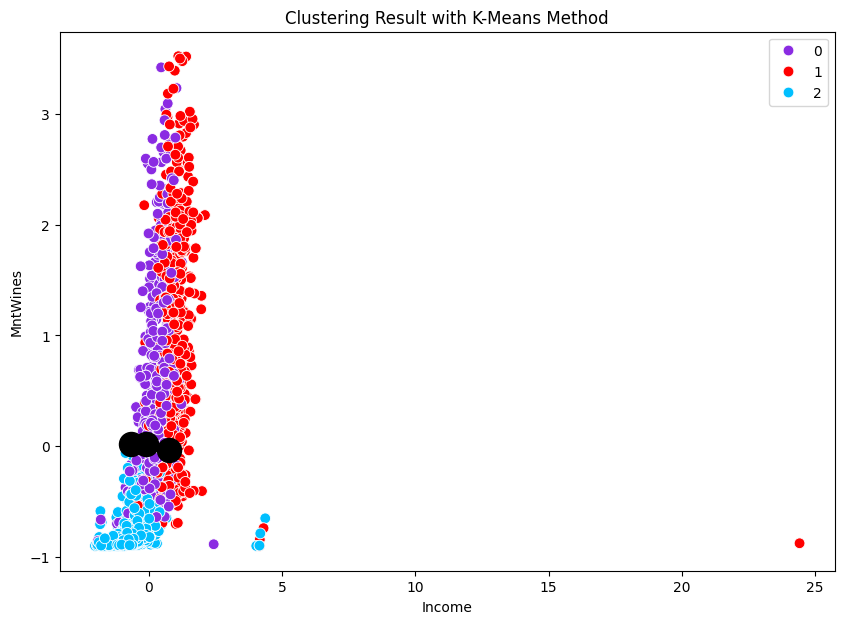

In [22]:
plt.figure(figsize=(10,7))
sns.scatterplot(x = "Income", y = "MntWines", hue=kmeans.labels_, palette=["blueviolet", "red", "deepskyblue"], data=df_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 4], kmeans.cluster_centers_[:, 5], s=300, c="black")
plt.xlabel("Income")
plt.ylabel("MntWines")
plt.title("Clustering Result with K-Means Method")
plt.show()


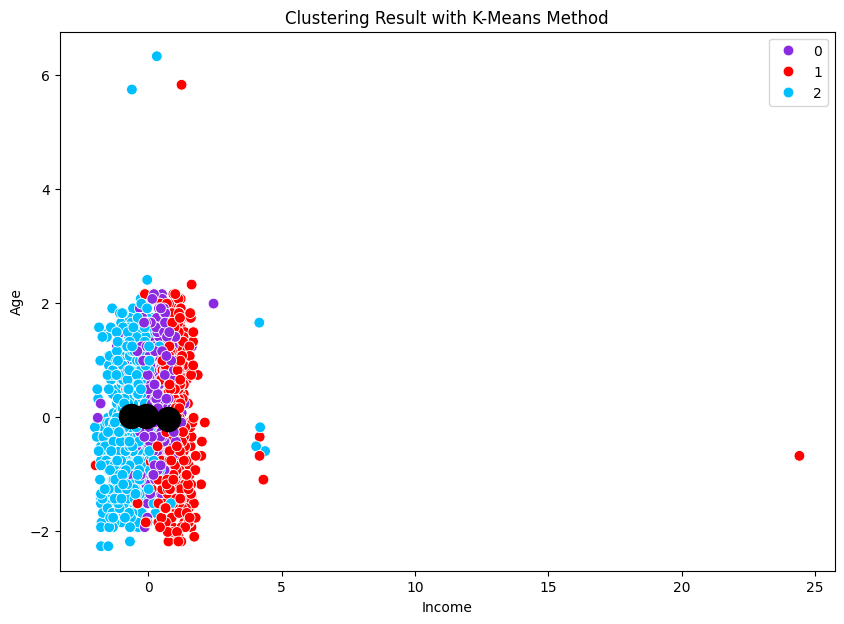

In [23]:
#memvisualisasikan hasil clustering dari income dan age untuk melihat pendapatan dan umur
plt.figure(figsize=(10,7))
sns.scatterplot(x = "Income", y = "Age", hue=kmeans.labels_, palette=["blueviolet", "red", "deepskyblue"], data=df_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 4], kmeans.cluster_centers_[:, 5], s=300, c="black")
plt.xlabel("Income")
plt.ylabel("Age")
plt.title("Clustering Result with K-Means Method")
plt.show()

In [24]:
df['KMeans'] = kmeans.labels_
# Now inverse transform the scaled numeric columns to retrieve the original values
df_scaled = scaler.inverse_transform(df_scaled)

# Display the first few rows of the DataFrame to verify the original values for numeric columns
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Tenure_Category,KMeans
0,1,0,58138,0,0,58,635,88,546,172,...,0,0,0,0,0,0,1,67,2,1
1,1,0,46344,1,1,38,11,1,6,2,...,0,0,0,0,0,0,0,70,2,2
2,1,3,71613,0,0,26,426,49,127,111,...,0,0,0,0,0,0,0,59,2,0
3,1,3,26646,1,0,26,11,4,20,10,...,0,0,0,0,0,0,0,40,2,2
4,3,1,58293,1,0,94,173,43,118,46,...,0,0,0,0,0,0,0,43,2,2


In [25]:
df['KMeans'].value_counts().sort_index()

,count
KMeans,
0,630
1,547
2,1039


In [26]:
from sklearn.cluster import KMeans, AgglomerativeClustering
import numpy as np

# Fungsi untuk menghitung mode
def mode(series):
    return series.mode().iloc[0] if not series.mode().empty else np.nan

#Lakukan Pengklusteran KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans'] = kmeans.fit_predict(df_scaled)

# Kelompokkan berdasarkan Kluster Aglomerat dan hitung statistik ringkasan
agg_dict = {
        'Education': ['mean', 'min', 'max'],
        'Marital_Status': ['mean', 'min', 'max'],
        'Income': ['mean', 'min', 'max'],
        'Kidhome': ['mean', 'min', 'max'],
        'Teenhome': ['mean', 'min', 'max'],
        'Recency': ['mean', 'min', 'max'],
        'MntWines': ['mean', 'min', 'max'],
        'MntFruits': ['mean', 'min', 'max'],
        'MntMeatProducts': ['mean', 'min', 'max'],
        'MntFishProducts': ['mean', 'min', 'max'],
        'MntSweetProducts': ['mean', 'min', 'max'],
        'MntGoldProds': ['mean', 'min', 'max'],
        'NumDealsPurchases': ['mean', 'min', 'max'],
        'NumWebPurchases': ['mean', 'min', 'max'],
        'NumCatalogPurchases': ['mean', 'min', 'max'],
        'NumStorePurchases': ['mean', 'min', 'max'],
        'NumWebVisitsMonth': ['mean', 'min', 'max'],
        'Age': ['mean', 'min', 'max'],
        'Tenure_Category': ['mean', 'min', 'max'],

    }
agg_result = df.groupby('KMeans').agg(agg_dict)
# Meratakan kolom MultiIndex untuk keterbacaan yang lebih baik
agg_result.columns = [f"{col[0]} ({col[1]})" if col[1] else col[0] for col in agg_result.columns]

# Mengubah hasil untuk menukar baris dan kolom
agg_result_transposed = agg_result.transpose()

# Menampilkan hasil yang ditransposisi sebagai DataFrame yang ditata untuk visualisasi yang lebih baik
agg_result_styled = agg_result_transposed.style.format(precision=2)

#Tampilkan DataFrame yang ditata
agg_result_styled


KMeans,0,1,2
Education (mean),1.59,1.73,2.12
Education (min),0.00,1.00,1.00
Education (max),3.00,3.00,3.00
Marital_Status (mean),1.36,1.38,2.12
Marital_Status (min),0.00,0.00,1.00
Marital_Status (max),3.00,3.00,3.00
Income (mean),34356.94,69515.42,221604.50
Income (min),1730.00,51948.00,153924.00
Income (max),51876.00,113734.00,666666.00
Kidhome (mean),0.72,0.15,0.38


# **HIERARCHICAL CLUSTERING**

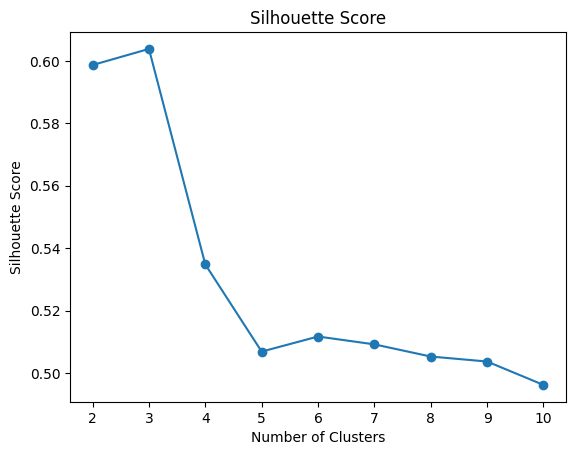

In [27]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    cluster_labels = fcluster(linkage(df_scaled, method='ward'), i, criterion='maxclust')
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

In [28]:
# Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters = 3, metric='euclidean', linkage='ward')
y_pred = hc.fit_predict(df)

In [29]:
# Add the cluster labels to the original data that you have been added with kmeans so you have a full dataframe include kmeans and agglo clustering
df['AgglomerativeCluster'] = y_pred

# show the df
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Tenure_Category,KMeans,AgglomerativeCluster
0,1,0,58138,0,0,58,635,88,546,172,...,0,0,0,0,0,1,67,2,1,0
1,1,0,46344,1,1,38,11,1,6,2,...,0,0,0,0,0,0,70,2,0,1
2,1,3,71613,0,0,26,426,49,127,111,...,0,0,0,0,0,0,59,2,1,0
3,1,3,26646,1,0,26,11,4,20,10,...,0,0,0,0,0,0,40,2,0,1
4,3,1,58293,1,0,94,173,43,118,46,...,0,0,0,0,0,0,43,2,1,0


In [30]:
from sklearn.cluster import KMeans, AgglomerativeClustering
import numpy as np

# Fungsi untuk menghitung mode
def mode(series):
    return series.mode().iloc[0] if not series.mode().empty else np.nan

# Perform KMeans Clustering (assuming you want to include this)
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans'] = kmeans.fit_predict(df_scaled)

# Perform Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
df['AgglomerativeCluster'] = agglo.fit_predict(df_scaled)

# Group by Agglomerative Clusters and calculate summary statistics
agg_result = df.groupby('AgglomerativeCluster').agg(
    {
        'Education': ['mean', 'min', 'max'],
        'Marital_Status': lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan,  # Mode calculation
        'Income': ['mean', 'min', 'max'],
        'Kidhome': ['mean', 'min', 'max'],
        'Teenhome': ['mean', 'min', 'max'],
        'Recency': ['mean', 'min', 'max'],
        'MntWines': ['mean', 'min', 'max'],
        'MntFruits': ['mean', 'min', 'max'],
        'MntMeatProducts': ['mean', 'min', 'max'],
        'MntFishProducts': ['mean', 'min', 'max'],
        'MntSweetProducts': ['mean', 'min', 'max'],
        'MntGoldProds': ['mean', 'min', 'max'],
        'NumDealsPurchases': ['mean', 'min', 'max'],
        'NumWebPurchases': ['mean', 'min', 'max'],
        'NumCatalogPurchases': ['mean', 'min', 'max'],
        'NumStorePurchases': ['mean', 'min', 'max'],
        'NumWebVisitsMonth': ['mean', 'min', 'max'],
        'AcceptedCmp3': ['mean', 'min', 'max'],
        'AcceptedCmp4': ['mean', 'min', 'max'],
        'AcceptedCmp5': ['mean', 'min', 'max'],
        'AcceptedCmp1': ['mean', 'min', 'max'],
        'AcceptedCmp2': ['mean', 'min', 'max'],
        'Complain': ['mean', 'min', 'max'],
        'Response': ['mean', 'min', 'max'],
        'Age': ['mean', 'min', 'max'],
        'Tenure_Category': ['mean', 'min', 'max'],

    }
)

# Flattening MultiIndex columns for better readability
agg_result.columns = [f"{col[0]} ({col[1]})" if col[1] else col[0] for col in agg_result.columns]

# Transposing the result to swap rows and columns
agg_result_transposed = agg_result.transpose()

# Displaying the transposed result as a styled DataFrame for better visualization
agg_result_styled = agg_result_transposed.style.format(precision=2)

# Display the styled DataFrame
agg_result_styled


AgglomerativeCluster,0,1,2
Education (mean),1.74,1.58,1.00
Education (min),1.00,0.00,1.00
Education (max),3.00,3.00,1.00
Marital_Status (),1.00,1.00,3.00
Income (mean),69384.28,33701.64,666666.00
Income (min),50611.00,1730.00,666666.00
Income (max),162397.00,50616.00,666666.00
Kidhome (mean),0.16,0.73,1.00
Kidhome (min),0.00,0.00,1.00
Kidhome (max),2.00,2.00,1.00


In [31]:
df['AgglomerativeCluster'].value_counts().sort_index()

,count
AgglomerativeCluster,
0,1134
1,1081
2,1


In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 10):  # Mencoba jumlah cluster dari 2 hingga 9
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)  # X adalah dataset
    score = silhouette_score(df_scaled, labels)
    silhouette_scores.append(score)
    print(f"Jumlah Cluster: {k}, Silhouette Score: {score}")

Jumlah Cluster: 2, Silhouette Score: 0.6016163187360459
Jumlah Cluster: 3, Silhouette Score: 0.6095370737155675
Jumlah Cluster: 4, Silhouette Score: 0.6112904568114635
Jumlah Cluster: 5, Silhouette Score: 0.550021165730555
Jumlah Cluster: 6, Silhouette Score: 0.537635424600885
Jumlah Cluster: 7, Silhouette Score: 0.5385402831462233
Jumlah Cluster: 8, Silhouette Score: 0.5223104862347875
Jumlah Cluster: 9, Silhouette Score: 0.5155753063172495


## **Hierarchical Visulaization**

### Single Linkage

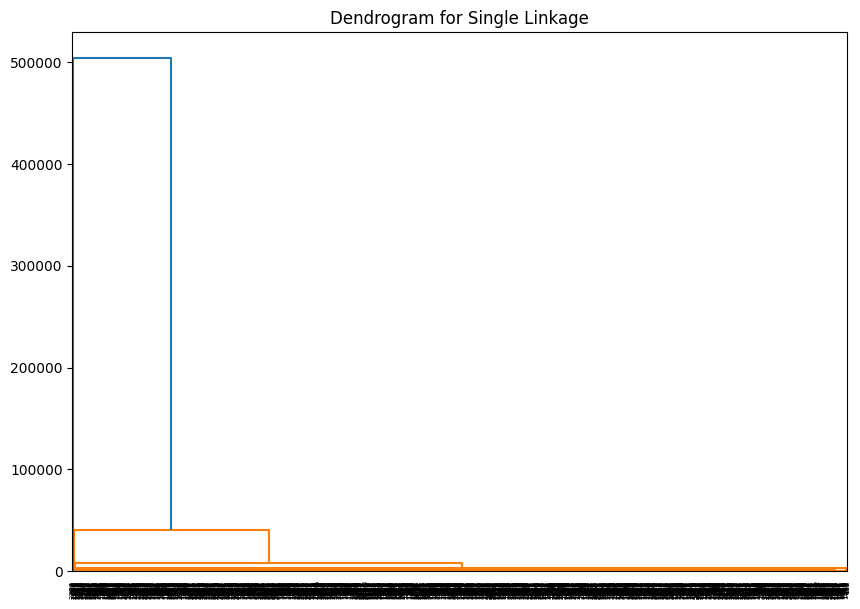

In [33]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Single Linkage")
dend = sch.dendrogram(sch.linkage(df_scaled, method='single'))
plt.show()

### Complete Linkage

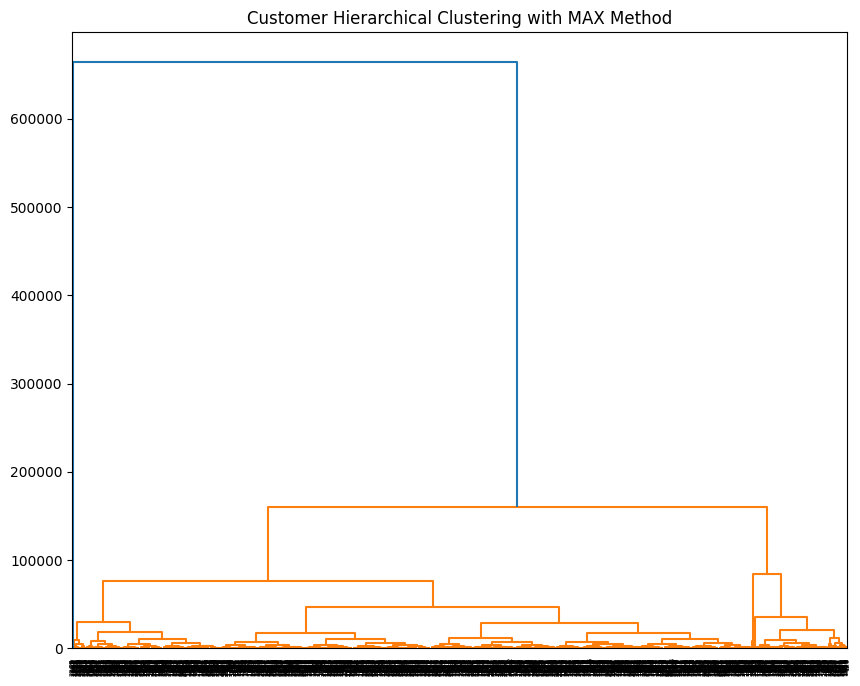

In [34]:
plt.figure(figsize=(10, 8))
plt.title("Customer Hierarchical Clustering with MAX Method")
dend = sch.dendrogram(sch.linkage(df_scaled, method='complete'))
plt.show()

### Average Linkage

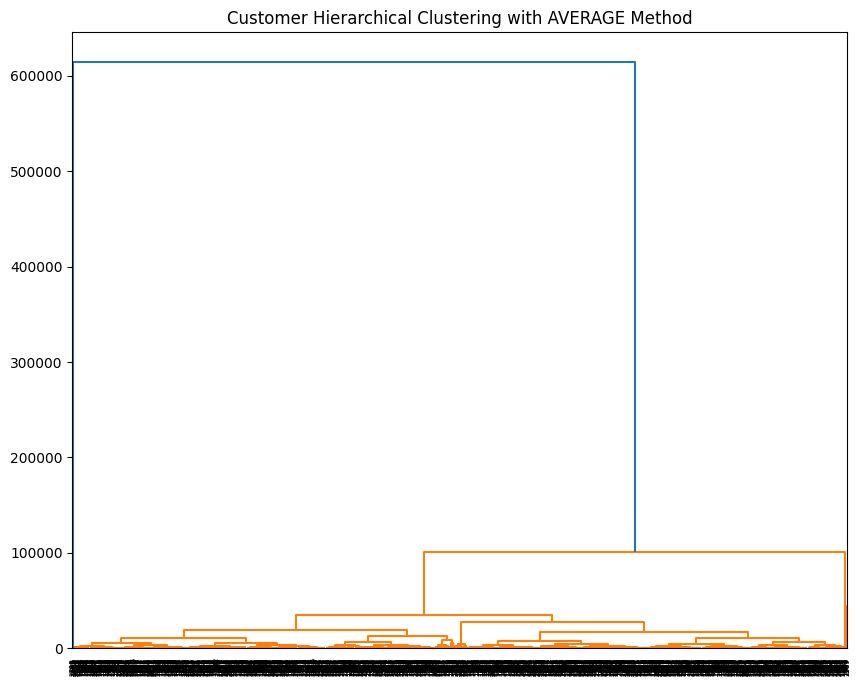

In [35]:
plt.figure(figsize=(10, 8))
plt.title("Customer Hierarchical Clustering with AVERAGE Method")
dend = sch.dendrogram(sch.linkage(df_scaled, method='average'))
plt.show()

### Ward Method

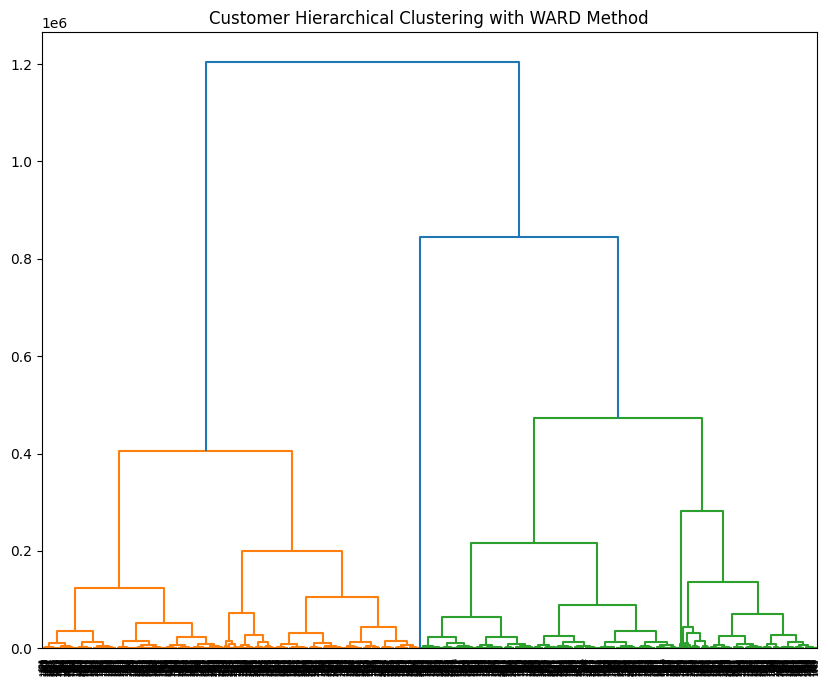

In [36]:
plt.figure(figsize=(10, 8))
plt.title("Customer Hierarchical Clustering with WARD Method")
dend = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.show()